# Принятие решений в бизнесе на основе данных

Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача
Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Часть 2. Анализ A/B-теста
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
Задача
Проанализируйте A/B-тест

Примите решение по результатам теста и объясните его. Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import os
import scipy.stats as stats

In [2]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150

# Часть 1. Приоритизация гипотез.

In [3]:
data_pg = pd.read_csv('/datasets/hypothesis.csv')

In [4]:
display(data_pg.info())
display(data_pg.describe(include='all'))
# for columns in data_pg.columns:
#     display(columns)
#     display(data_pg[columns].unique())
#     display(data_pg[columns].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,Hypothesis,Reach,Impact,Confidence,Efforts
count,9,9.000000,9.000000,9.000000,9.000000
unique,9,NaN,NaN,NaN,NaN
top,"Запустить собственную службу доставки, что сократит срок доставки заказов",NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,4.777778,4.777778,5.555556,4.888889
std,NaN,3.153481,3.192874,3.045944,2.803767
min,NaN,1.000000,1.000000,1.000000,1.000000
25%,NaN,3.000000,3.000000,3.000000,3.000000
50%,NaN,3.000000,3.000000,7.000000,5.000000
75%,NaN,8.000000,7.000000,8.000000,6.000000


In [5]:
data_pg

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [6]:
#высчитываем ICE и RICE
data_pg['ICE'] = round(data_pg['Impact'] * data_pg['Confidence'] / data_pg['Efforts'], 1)
data_pg['RICE'] = data_pg['Reach'] * data_pg['Impact'] * data_pg['Confidence'] / data_pg['Efforts']
data_pg[['Hypothesis', 'RICE', 'ICE']].sort_values(by='RICE',
                                                   ascending=False).style.bar(subset=['RICE', 'ICE'], color='#66cc99')

,Hypothesis,RICE,ICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112,11.2
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56,7
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40,13.3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40,8
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9,1.1
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4,2
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4,1.3
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1


Различие итогов исходят из-за того, что в RICE учитывается то, скольких пользователей затронет изменение.
Следовательно, в данной задаче необходимо ориентироваться на RICE. Самая перспективная гипотеза - добавление формы подписки на все основные страницы.
Так же можно добавить блоки рекомендаций товаров на сайт интернет магазина, добавить два новых канала привлечения трафика, показать на главной странице баннеры с актуальными акциями и распродажами.

# Часть 2. Анализ A/B-теста

# Предобработка данных

In [7]:
data_orders = pd.read_csv('/datasets/orders.csv')
data_visitors = pd.read_csv('/datasets/visitors.csv')

In [8]:
data_visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [9]:
data_orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [10]:
for file in os.listdir('/datasets/'):
    name = file.split('.csv')[0]
    if name in ['orders', 'visitors']:
        data = pd.read_csv('/datasets/{}'.format(file))
        print('--------->', name)
        display(data.info())
        display(data.describe(include='all'))
        for columns in data.columns:
            print('----------------------------------------------------------------------------------------------------------')
            print(columns, '<--')
            display(data[columns].unique())
            display(data[columns].value_counts())
        print('file_end')
        print('----------------------------------------------------------------------------------------------------------')
        print('----------------------------------------------------------------------------------------------------------')

---------> orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,transactionId,visitorId,date,revenue,group
count,1.197000e+03,1.197000e+03,1197,1.197000e+03,1197
unique,NaN,NaN,31,NaN,2
top,NaN,NaN,2019-08-05,NaN,B
freq,NaN,NaN,48,NaN,640
mean,2.155621e+09,2.165960e+09,NaN,8.348006e+03,NaN
std,1.229085e+09,1.236014e+09,NaN,3.919113e+04,NaN
min,1.062393e+06,5.114589e+06,NaN,5.000000e+01,NaN
25%,1.166776e+09,1.111826e+09,NaN,1.220000e+03,NaN
50%,2.145194e+09,2.217985e+09,NaN,2.978000e+03,NaN
75%,3.237740e+09,3.177606e+09,NaN,8.290000e+03,NaN


----------------------------------------------------------------------------------------------------------
transactionId <--


array([3667963787, 2804400009, 2961555356, ..., 1807773912, 1947021204,
       3936777065])

3574407166    1
2470658885    1
1476831880    1
3709669952    1
2764584088    1
             ..
1168756094    1
1185885568    1
11068804      1
486237576     1
1192185169    1
Name: transactionId, Length: 1197, dtype: int64

----------------------------------------------------------------------------------------------------------
visitorId <--


array([3312258926, 3642806036, 4069496402, ...,  370388673,  573423106,
       2108080724])

4256040402    11
2458001652    11
2378935119     9
2038680547     8
3717692402     5
              ..
3254689071     1
4186744110     1
1455861274     1
3612778094     1
3149228032     1
Name: visitorId, Length: 1031, dtype: int64

----------------------------------------------------------------------------------------------------------
date <--


array(['2019-08-15', '2019-08-16', '2019-08-01', '2019-08-22',
       '2019-08-17', '2019-08-23', '2019-08-02', '2019-08-18',
       '2019-08-24', '2019-08-03', '2019-08-25', '2019-08-28',
       '2019-08-19', '2019-08-06', '2019-08-26', '2019-08-29',
       '2019-08-04', '2019-08-20', '2019-08-09', '2019-08-07',
       '2019-08-30', '2019-08-05', '2019-08-27', '2019-08-21',
       '2019-08-08', '2019-08-10', '2019-08-31', '2019-08-11',
       '2019-08-12', '2019-08-13', '2019-08-14'], dtype=object)

2019-08-05    48
2019-08-14    47
2019-08-12    47
2019-08-15    46
2019-08-06    46
2019-08-28    45
2019-08-01    45
2019-08-27    44
2019-08-02    44
2019-08-19    43
2019-08-08    43
2019-08-29    42
2019-08-07    42
2019-08-09    41
2019-08-26    41
2019-08-22    41
2019-08-23    40
2019-08-03    40
2019-08-10    39
2019-08-16    38
2019-08-21    37
2019-08-30    35
2019-08-13    35
2019-08-04    33
2019-08-20    32
2019-08-31    32
2019-08-24    31
2019-08-11    26
2019-08-18    26
2019-08-17    24
2019-08-25    24
Name: date, dtype: int64

----------------------------------------------------------------------------------------------------------
revenue <--


array([   1650,     730,     400,    9759,    2308,    2210,    1860,
          1044,   13710,    1855,    4008,    4499,    7370,   11985,
         10980,   15277,    1060,     990,   16490,    1190,     300,
          1050,     632,   15185,    7555,    3488,    7620,    5280,
           700,     190,     383,    1680,   22785,    2355,    2470,
          6250,   19260,     610,    2986,    1090,    9290,    2480,
          3000,    2140,    3590,    6990,    1250,    2970,   18100,
           100,    2750,     570,    2978,    1440,    7860,   56650,
           790,    1350,    2540,    1710,    2350,   14610,    8999,
         10510,   29499,     780,     890,    4400,   32350,   40740,
          2490,    2080,    5400,    5100,    4020,     690,   12350,
          1290,     382,    2110,    1490,   17868,    1940,   26550,
          5970,     987,    9024,    5555,    7129,    3240,    2995,
          2550,   17600,     850,    5365,    8390,    5870,    5020,
         14489,    8

990      17
890      13
390      13
1490     10
1190     10
         ..
1139      1
25250     1
3180      1
10970     1
6145      1
Name: revenue, Length: 713, dtype: int64

----------------------------------------------------------------------------------------------------------
group <--


array(['B', 'A'], dtype=object)

B    640
A    557
Name: group, dtype: int64

file_end
----------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------
---------> visitors
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

,date,group,visitors
count,62,62,62.000000
unique,31,2,NaN
top,2019-08-27,A,NaN
freq,2,31,NaN
mean,NaN,NaN,607.290323
std,NaN,NaN,114.400560
min,NaN,NaN,361.000000
25%,NaN,NaN,534.000000
50%,NaN,NaN,624.500000
75%,NaN,NaN,710.500000


----------------------------------------------------------------------------------------------------------
date <--


array(['2019-08-01', '2019-08-02', '2019-08-03', '2019-08-04',
       '2019-08-05', '2019-08-06', '2019-08-07', '2019-08-08',
       '2019-08-09', '2019-08-10', '2019-08-11', '2019-08-12',
       '2019-08-13', '2019-08-14', '2019-08-15', '2019-08-16',
       '2019-08-17', '2019-08-18', '2019-08-19', '2019-08-20',
       '2019-08-21', '2019-08-22', '2019-08-23', '2019-08-24',
       '2019-08-25', '2019-08-26', '2019-08-27', '2019-08-28',
       '2019-08-29', '2019-08-30', '2019-08-31'], dtype=object)

2019-08-27    2
2019-08-30    2
2019-08-28    2
2019-08-07    2
2019-08-18    2
2019-08-22    2
2019-08-03    2
2019-08-06    2
2019-08-19    2
2019-08-25    2
2019-08-13    2
2019-08-01    2
2019-08-24    2
2019-08-04    2
2019-08-23    2
2019-08-11    2
2019-08-16    2
2019-08-12    2
2019-08-14    2
2019-08-29    2
2019-08-31    2
2019-08-09    2
2019-08-02    2
2019-08-05    2
2019-08-20    2
2019-08-15    2
2019-08-10    2
2019-08-08    2
2019-08-21    2
2019-08-26    2
2019-08-17    2
Name: date, dtype: int64

----------------------------------------------------------------------------------------------------------
group <--


array(['A', 'B'], dtype=object)

A    31
B    31
Name: group, dtype: int64

----------------------------------------------------------------------------------------------------------
visitors <--


array([719, 619, 507, 717, 756, 667, 644, 610, 617, 406, 718, 595, 748,
       735, 628, 361, 412, 668, 502, 575, 646, 609, 468, 395, 621, 722,
       711, 594, 577, 490, 699, 713, 581, 509, 770, 707, 655, 709, 654,
       369, 721, 543, 769, 746, 544, 413, 421, 737, 487, 560, 656, 650,
       546, 378, 679, 676, 720, 531])

610    2
718    2
654    2
490    2
509    1
575    1
699    1
709    1
361    1
560    1
679    1
421    1
676    1
546    1
544    1
543    1
722    1
707    1
668    1
667    1
406    1
531    1
656    1
655    1
395    1
650    1
646    1
644    1
770    1
577    1
711    1
581    1
617    1
378    1
413    1
746    1
502    1
628    1
756    1
369    1
412    1
621    1
748    1
619    1
487    1
507    1
609    1
737    1
735    1
468    1
595    1
594    1
721    1
720    1
719    1
717    1
713    1
769    1
Name: visitors, dtype: int64

file_end
----------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------


В группах А и В неравномерное распределение, что уже является проблемой при АВ тестировании. Необходимот узнать, насколько кол-во пользователей различается, а так же проверить на наличие одинакового айди в двух группах.

In [11]:
print(len(data_orders.query('group == "A"')['visitorId'].unique()))
print(len(data_orders.query('group == "B"')['visitorId'].unique()))

503
586


In [12]:
test = data_orders.query('group == "B"')['visitorId'].unique()
print(len(data_orders.query('group == "A" and visitorId in @test')['visitorId'].unique()))

58


Имеются кроссюзеры. Уже достаточно причин для прекращение тестирования, необходимо писать запрос на исправление ошибок.

In [13]:
crossUsers = data_orders.query('group == "A" and visitorId in @test')['visitorId'].unique()
crossUsers

array([4069496402,  199603092, 3803269165, 2378935119,  237748145,
       4256040402, 2038680547, 1738359350, 2458001652, 3891541246,
       2716752286, 3656415546, 2686716486, 2954449915, 2927087541,
       3234906277,  457167155, 2579882178, 3957174400, 1648269707,
       2780786433,  818047933, 2044997962, 1959144690, 3202540741,
       1333886533,  351125977, 3951559397,  393266494, 3984495233,
       4120364173, 4266935830, 1230306981, 1294878855, 1614305549,
          8300375,  477780734, 1668030113, 3717692402, 3766097110,
       3941795274,  471551937, 1316129916, 1801183820, 1602967004,
       2587333274, 2600415354,  232979603, 3972127743, 1404934699,
        276558944, 3062433592, 2654030115, 3963646447, 4186807279,
       2712142231, 2949041841,  963407295])

In [14]:
# чистим дубли
data_orders = data_orders[~data_orders['visitorId'].isin(crossUsers)]

In [15]:
# группы А и В отличаются по кол-ву пользователей. Необходимо это отметить в отчете
print(len(data_orders.query('group == "A"')['visitorId'].unique()))
print(len(data_orders.query('group == "B"')['visitorId'].unique()))
print(len(data_orders.query('group == "A"')['visitorId']))
print(len(data_orders.query('group == "B"')['visitorId']))

445
528
468
548


In [16]:
data_orders['date'] = pd.to_datetime(data_orders['date'], format='%Y-%m-%d')
data_visitors['date'] = pd.to_datetime(data_visitors['date'], format='%Y-%m-%d')

In [17]:
data_orders.drop_duplicates(inplace=True)
data_visitors.drop_duplicates(inplace=True)

# Основные расчеты

In [18]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = data_orders[['date', 'group']].drop_duplicates()

In [19]:
# Агрегируем значения. Найдём число уникальных ID заказов и пользователей. 
# Подсчитаем сумму средних чеков
ordersAggregated = datesGroups.apply(lambda x: data_orders[np.logical_and(data_orders['date'] <= x['date'],
                                                                    data_orders['group'] == x['group'])]\
             .agg({'date':'max','group':'max','transactionId': pd.Series.nunique,
                   'visitorId': pd.Series.nunique, 'revenue':'sum'}), axis=1).sort_values(by=['date','group'])

In [20]:
# Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(lambda x: data_visitors[np.logical_and(data_visitors['date'] <= x['date'],
                                                                         data_visitors['group'] == x['group'])]\
             .agg({'date':'max','group':'max','visitors':'sum'}), axis=1).sort_values(by=['date','group'])

In [21]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], 
                                        right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'transactionId', 'buyers', 'revenue', 'visitors']
print(cumulativeData.head(5))

        date group  transactionId  buyers  revenue  visitors
0 2019-08-01     A             23      19   142779       719
1 2019-08-01     B             17      17    59758       713
2 2019-08-02     A             42      36   234381      1338
3 2019-08-02     B             40      39   221801      1294
4 2019-08-03     A             66      60   346854      1845


<div style="border:solid black 4px; padding: 20px">
1. Построим графики кумулятивной выручки.
</div>

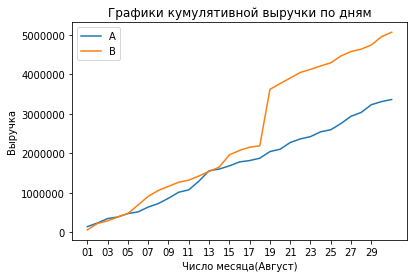

In [22]:
# Построим графики кумулятивной выручки по дням и группам A/B-тестирования
import pylab
from pylab import *
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'transactionId', 'visitors']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'transactionId', 'visitors']]

plt.plot(cumulativeRevenueA['date'].dt.strftime('%d'), cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'].dt.strftime('%d'), cumulativeRevenueB['revenue'], label='B')

# pylab.xticks(range(2))
xticks(np.arange(0, 30, step=2))
plt.title('Графики кумулятивной выручки по дням')
plt.xlabel('Число месяца(Август)')
plt.ylabel('Выручка')
plt.legend();

<div style="border:solid green 4px; padding: 20px">Выручка почти равномерно увеличивается в течение всего теста. Однако график выручки группы В в одной точке резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.
</div>

<div style="border:solid black 4px; padding: 20px">
2. Построим графики среднего чека по группам
</div>

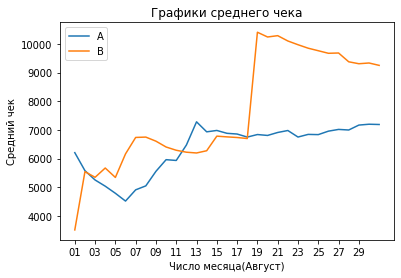

In [23]:
# Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
plt.plot(cumulativeRevenueA['date'].dt.strftime('%d'), cumulativeRevenueA['revenue']
         /cumulativeRevenueA['transactionId'], label='A')
plt.plot(cumulativeRevenueB['date'].dt.strftime('%d'), cumulativeRevenueB['revenue']
         /cumulativeRevenueB['transactionId'], label='B')
xticks(np.arange(0, 30, step=2))
plt.title('Графики среднего чека')
plt.xlabel('Число месяца(Август)')
plt.ylabel('Средний чек')
plt.legend();

<div style="border:solid green 4px; padding: 20px">
Средний чек тоже становится равномерным ближе к середине теста, но для группы B в однин момент резко возрастает. Возможно, в группу B во второй половине теста попали крупные заказы (резкий всплеск на графике). необходимо в дальнейшем убрать данные выбросы.
    </div>

<div style="border:solid black 4px; padding: 20px">
3. Построим график относительного различия для среднего чека.
</div>

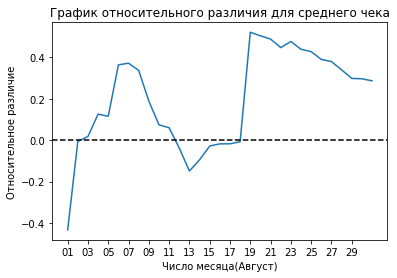

In [24]:
# Построим график относительного различия для среднего чека. 
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', right_on='date', how='left', suffixes=['_A', '_B'])
plt.plot(mergedCumulativeRevenue['date'].dt.strftime('%d'), 
         (mergedCumulativeRevenue['revenue_B']/mergedCumulativeRevenue['transactionId_B'])
         /(mergedCumulativeRevenue['revenue_A']/mergedCumulativeRevenue['transactionId_A'])-1)
xticks(np.arange(0, 30, step=2))
plt.title('График относительного различия для среднего чека')
plt.xlabel('Число месяца(Август)')
plt.ylabel('Относительное различие')
plt.axhline(y=0, color='black', linestyle='--');

<div style="border:solid green 4px; padding: 20px">
Резкие скачки на данном графике определенно говорят о выбросах.
    </div>

<div style="border:solid black 4px; padding: 20px">
4. Проанализируем график кумулятивной конверсии.
</div>

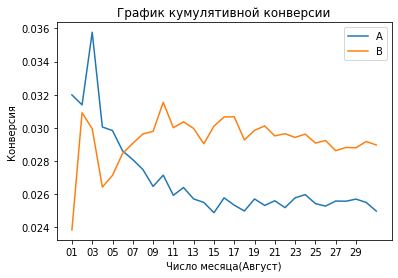

In [25]:
# Проанализируем график кумулятивной конверсии.
cumulativeData['conversion'] = cumulativeData['transactionId']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.plot(cumulativeDataA['date'].dt.strftime('%d'), cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'].dt.strftime('%d'), cumulativeDataB['conversion'], label='B')
plt.legend()

plt.title('График кумулятивной конверсии')
plt.xlabel('Число месяца(Август)')
plt.ylabel('Конверсия')
xticks(np.arange(0, 30, step=2));

<div style="border:solid green 4px; padding: 20px">
Графики ассиметричны. Группы не могут закрепиться и постоянно колеблятся. Так же группа В намного весомее группы А.
    </div>

<div style="border:solid black 4px; padding: 20px">
5. Построим график относительного различия кумулятивных конверсий.
</div>

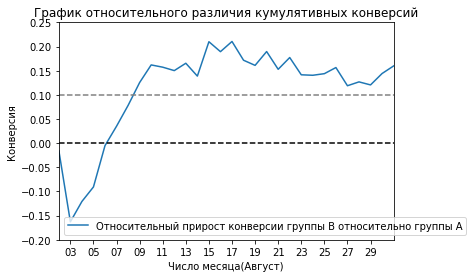

In [26]:
# Построим график относительного различия кумулятивных конверсий
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].\
                merge(cumulativeDataB[['date','conversion']],left_on='date', right_on='date', how='left', suffixes=['_A', '_B'])

plt.plot(mergedCumulativeConversions['date'].dt.strftime('%d'),
         mergedCumulativeConversions['conversion_B']/mergedCumulativeConversions['conversion_A']-1,
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend();

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.title('График относительного различия кумулятивных конверсий')
plt.xlabel('Число месяца(Август)')
plt.ylabel('Конверсия')
xticks(np.arange(0, 30, step=2));
plt.axis([1, 30, -0.2, 0.25]);

<div style="border:solid green 4px; padding: 20px">
В начале теста группа B значительно проигрывала группе A, затем очень сильно вырвалась вперёд. Конверсия ее колеблится, но не падает ниже 10 пунктов преимущества.
    </div>

<div style="border:solid black 4px; padding: 20px">
6. Изучим точечный график распределения кол-ва заказов.
</div>

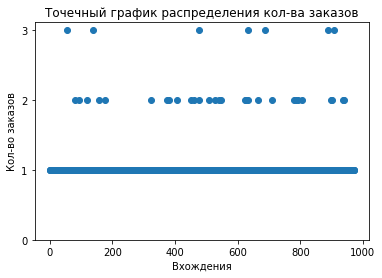

In [27]:
# Изучим точечный график распределения кол-ва заказов
Orderbybuyers = data_orders.groupby('visitorId',as_index=False).agg({'transactionId' : pd.Series.nunique})
x_values = pd.Series(range(0,len(Orderbybuyers)))
plt.scatter(x_values, Orderbybuyers['transactionId'])
plt.title('Точечный график распределения кол-ва заказов')
plt.xlabel('Вхождения')
plt.ylabel('Кол-во заказов')
plt.yticks(np.arange(0, Orderbybuyers['transactionId'].max()+1, step=1));

<div style="border:solid green 4px; padding: 20px">
Видим выбросы. Больше всего одиночных заказов.
    </div>

<div style="border:solid black 4px; padding: 20px">
7. Получим перцентиль количества заказов.
</div>

In [28]:
# получим перцентиль
print(np.percentile(Orderbybuyers['transactionId'], [90, 95, 99]))

[1. 1. 2.]


<div style="border:solid green 4px; padding: 20px">
Не более 5% пользователей покупают больше 1 раза.
</div>

<div style="border:solid black 4px; padding: 20px">
8. Изучим точечный график распределения стоимостей заказов.
</div>

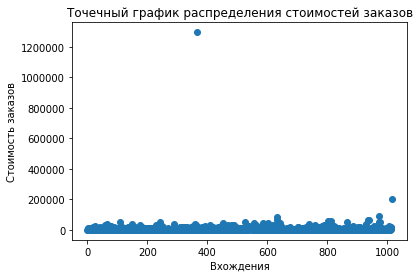

In [29]:
# Изучим точечный график распределения стоимостей заказов
x_values = pd.Series(range(0,len(data_orders['revenue'])))
plt.scatter(x_values, data_orders['revenue'])
plt.title('Точечный график распределения стоимостей заказов')
plt.xlabel('Вхождения')
plt.ylabel('Стоимость заказов');

<div style="border:solid green 4px; padding: 20px">
Есть немного дорогих заказов. По графику сложно выбрать границу аномальных заказов.
</div>

<div style="border:solid black 4px; padding: 20px">
9. Получим перцентиль стоимости заказов.
</div>

In [30]:
# получим перцентиль
print(np.percentile(data_orders['revenue'], [90, 95, 99]))

[17990. 26785. 53904.]


<div style="border:solid green 4px; padding: 20px">
Не более 5% заказов имеют стоимость больше 26785 и не более 1% - 53904.
</div>

<div style="border:solid black 4px; padding: 20px">
10. Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.
</div>

In [31]:
# Создадим переменные ordersByUsersA и ordersByUsersBъ для пользователей, которые заказывали хотя бы 1 раз, 
# укажем число совершённых заказов.
ordersByUsersA = data_orders[data_orders['group']=='A'].groupby('visitorId',
                                                                as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = data_orders[data_orders['group']=='B'].groupby('visitorId',
                                                      as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

In [32]:
# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 
# Тем, кто ничего не заказал, будут соответствовать нули. 
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0,index=np.arange(cumulativeRevenueA['visitors'].
                                                 sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(cumulativeRevenueB['visitors'].
                                                  sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [33]:
# Выведем относительный прирост конверсии группы B
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.005
0.166


<div style="border:solid green 4px; padding: 20px">
p-value меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, можно отвергнуть. Относительный выйгрыш группы В равен 16.6%
</div>

<div style="border:solid black 4px; padding: 20px">
11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
</div>

In [34]:
# Найдём относительные различия в среднем чеке между группами
print("{0:.3f}".format(stats.mannwhitneyu(data_orders[data_orders['group']=='A']['revenue'],
                                          data_orders[data_orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(data_orders[data_orders['group']=='B']['revenue'].
                       mean()/data_orders[data_orders['group']=='A']['revenue'].mean()-1))

0.415
0.287


<div style="border:solid green 4px; padding: 20px">
P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A
</div>

<div style="border:solid black 4px; padding: 20px">
12. Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.
</div>

In [35]:
# Уберем выбросы в кол-ве заказов и узнаем, сколько всего аномальных пользователей
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] >= 2]['visitorId'],
                                 ordersByUsersB[ordersByUsersB['orders'] >= 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = data_orders[data_orders['revenue'] > 25000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

568     113298937
1099    148427295
461     154576532
928     204675465
33      249864742
Name: visitorId, dtype: int64
(93,)


In [36]:
# Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным
sampleAFiltered = pd.concat([ordersByUsersA
                             [np.logical_not(ordersByUsersA['visitorId'].
                                             isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(cumulativeRevenueA['visitors'].
                                                          sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB
                             [np.logical_not(ordersByUsersB['visitorId'].
                                             isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(cumulativeRevenueB['visitors'].
                                                          sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [37]:
# Применим статистический критерий Манна-Уитни к полученным выборкам
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.011
0.167


<div style="border:solid green 4px; padding: 20px">
P-value меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, можно отвергнуть. Относительный выйгрыш группы В равен 16.7%
</div>

<div style="border:solid black 4px; padding: 20px">
13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
</div>

In [38]:
# Найдём относительные различия в среднем чеке между группами теста по очищенным данным
print("{0:.3f}".format(stats.mannwhitneyu(
    data_orders[np.logical_and(
        data_orders['group']=='A',
        np.logical_not(data_orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    data_orders[np.logical_and(
        data_orders['group']=='B',
        np.logical_not(data_orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    data_orders[np.logical_and(
        data_orders['group']=='B',
        np.logical_not(data_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    data_orders[np.logical_and(
        data_orders['group']=='A',
        np.logical_not(data_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.270
-0.077


<div style="border:solid green 4px; padding: 20px">
P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек группы B стал значительно ниже, чем раньше и даже проигрывает среднему чеку группы A
</div>

# Итог

<div style="border:solid green 6px; padding: 20px">

**Итоги по первой части:**

Самая перспективная гипотеза - добавление формы подписки на все основные страницы. Так же можно добавить блоки рекомендаций товаров на сайт интернет магазина, добавить два новых канала привлечения трафика, показать на главной странице баннеры с актуальными акциями и распродажами.

**Итоги по второй части:**

Очень сильные колебания групп, нет фиксации, большие выбросы, разное кол-во пользователей.

Ввиду ошибок, изложенных выше, необходимо продолжить тест, перед этим проверив и исправив все ошибки в данных, так как группы сильно различаются, неравномерны по кол-ву пользователей, а так же средние показатели групп не зафиксировались(что видно невооруженным взглядом).

Важно обязщательно успешно провести АА тест, иначе итог анализа по нынешним данным не даст никакой полезной информации по дальнейшему развитию проекта. Не известно, сколько еще ошибок имеется после некорректного проведения АА теста.

По предварительным данным различия групп не существенны.
    </div>

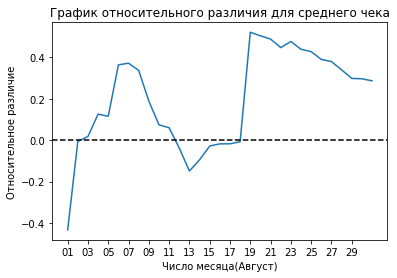

In [39]:
plt.plot(mergedCumulativeRevenue['date'].dt.strftime('%d'), 
         (mergedCumulativeRevenue['revenue_B']/mergedCumulativeRevenue['transactionId_B'])
         /(mergedCumulativeRevenue['revenue_A']/mergedCumulativeRevenue['transactionId_A'])-1)
xticks(np.arange(0, 30, step=2))
plt.title('График относительного различия для среднего чека')
plt.xlabel('Число месяца(Август)')
plt.ylabel('Относительное различие')
plt.axhline(y=0, color='black', linestyle='--');

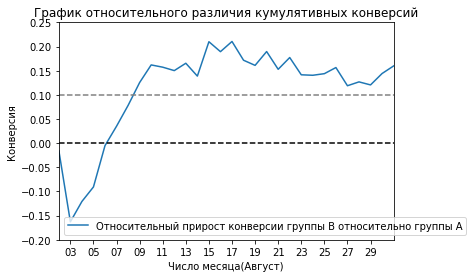

In [40]:
plt.plot(mergedCumulativeConversions['date'].dt.strftime('%d'),
         mergedCumulativeConversions['conversion_B']/mergedCumulativeConversions['conversion_A']-1,
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend();

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.title('График относительного различия кумулятивных конверсий')
plt.xlabel('Число месяца(Август)')
plt.ylabel('Конверсия')
xticks(np.arange(0, 30, step=2));
plt.axis([1, 30, -0.2, 0.25]);